<font size=4><b> EDA for Instacart market basket analysis

<font size=4><b>  Introduction

In this notebook, we perform EDA on the instacart market basket analysis dataset. 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Importing the aisle, department and product datasets
aisles=pd.read_csv('../raw_data/aisles.csv')
departments=pd.read_csv("../raw_data/departments.csv")
products=pd.read_csv("../raw_data/products.csv")

Let us explore the products dataframe to find out the amount of products by department and aisles

In [18]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [20]:
#Group by department
prd_with_dept=products.merge(departments,on="department_id")
prd_per_dept=prd_with_dept['department'].value_counts()
#print(prd_per_dept)

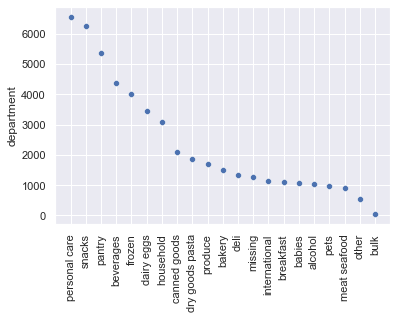

In [21]:
#Plotting the products by department
sns.set()
sns.scatterplot(x=prd_per_dept.index,y=prd_per_dept)
plt.xticks(rotation=90)
plt.show()

The personal care and snack aisles have the most products while bulk has the least. 

Let us look at the order data to get more information.

In [22]:
orders=pd.read_csv("../raw_data/orders.csv")
print(orders.info())
orders_prior=orders[orders["eval_set"]=="prior"]
print("Number of orders in prior set is",len(orders_prior))
orders_train=orders[orders["eval_set"]=="train"]
print("Number of orders in training set is",len(orders_train))
orders_test=orders[orders["eval_set"]=="test"]
print("Number of orders in test set is",len(orders_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
Number of orders in prior set is 3214874
Number of orders in training set is 131209
Number of orders in test set is 75000


[]

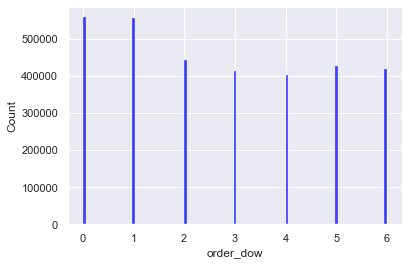

In [23]:
#Distribution of orders in the prior orders dataset among the 
#days of the week
sns.set()
sns.histplot(orders_prior["order_dow"],color='blue')
plt.plot()

[]

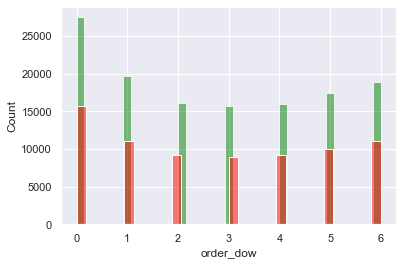

In [24]:
#Distribution of orders in the prior orders dataset among the 
#days of the week
sns.histplot(orders_train["order_dow"],color='green',alpha=0.5)
sns.histplot(orders_test["order_dow"],color='red',alpha=0.5)
plt.plot()

There are more orders on Day 0 than others. Day 1 and day 6 are next in terms of the highest orders. 

[]

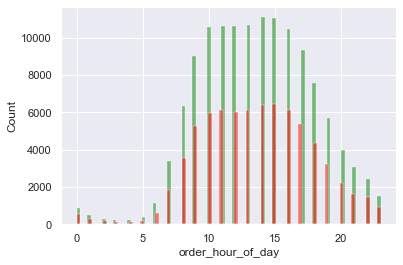

In [25]:
#Distribution of orders in the prior orders dataset among the 
#hours of the day
sns.histplot(orders_train["order_hour_of_day"],color='green',alpha=0.5)
sns.histplot(orders_test["order_hour_of_day"],color='red',alpha=0.5)
plt.plot()

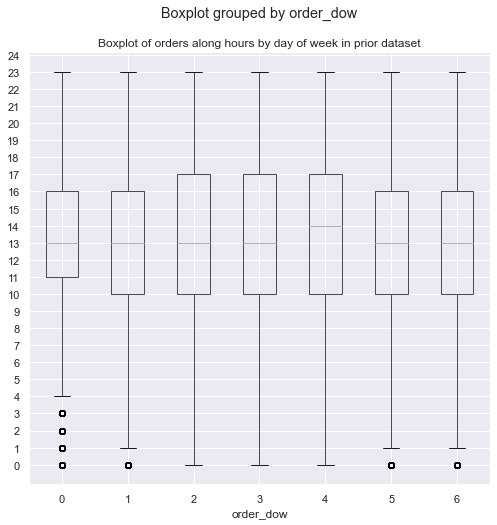

In [26]:
orders_prior.boxplot(["order_hour_of_day"],by="order_dow",figsize=(8,8))
plt.yticks(list(range(25)))
plt.title("Boxplot of orders along hours by day of week in prior dataset")
plt.show()

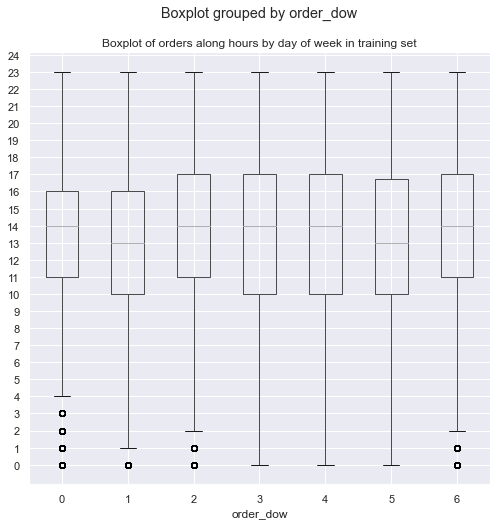

In [27]:
orders_train.boxplot(["order_hour_of_day"],by="order_dow",figsize=(8,8))
plt.yticks(list(range(25)))
plt.title("Boxplot of orders along hours by day of week in training set")
plt.show()

Most orders are around 2 pm on all days anon the training set. Let's see if this is the case on the test set too. Also, 75% of orders are during regualr hours i.e 9 am to 5 pm.

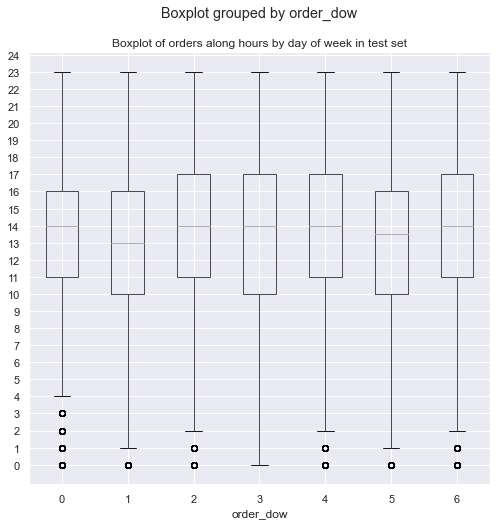

In [28]:
orders_test.boxplot(["order_hour_of_day"],by="order_dow",figsize=(8,8))
plt.yticks(list(range(25)))
plt.title("Boxplot of orders along hours by day of week in test set")
plt.show()

In [29]:
orders.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,1.000000,-0.000165,-0.000098,0.000929,-0.000019,0.000523
user_id,-0.000165,1.000000,-0.001424,-0.001205,-0.001007,0.001591
order_number,-0.000098,-0.001424,1.000000,0.015258,-0.035690,-0.360564
order_dow,0.000929,-0.001205,0.015258,1.000000,0.005978,-0.028107
order_hour_of_day,-0.000019,-0.001007,-0.035690,0.005978,1.000000,0.001291
days_since_prior_order,0.000523,0.001591,-0.360564,-0.028107,0.001291,1.000000


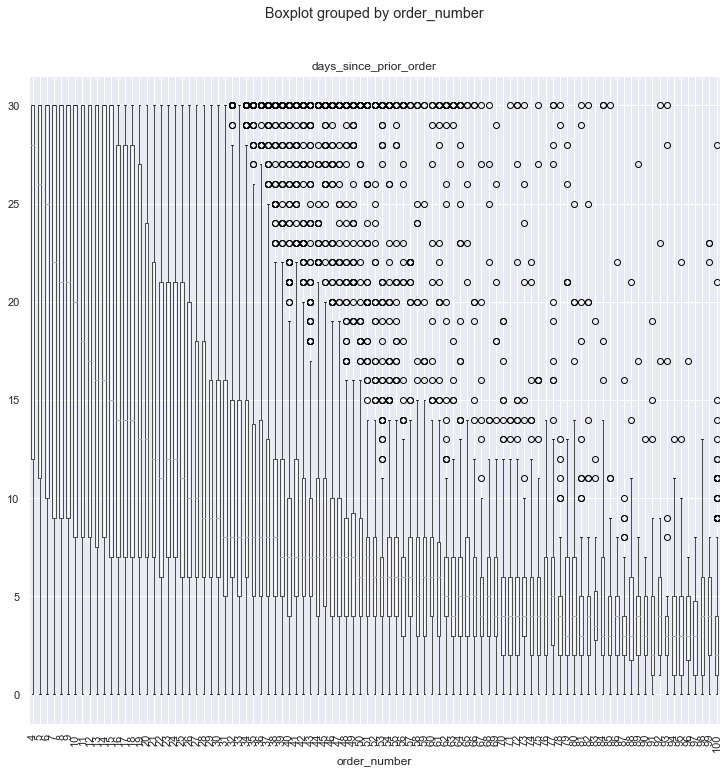

In [30]:
orders_train.boxplot(["days_since_prior_order"],by="order_number",figsize=(12,12))
#plt.title("Boxplot of orders along hours by day of week in test set")
plt.xticks(rotation=90)
plt.show()

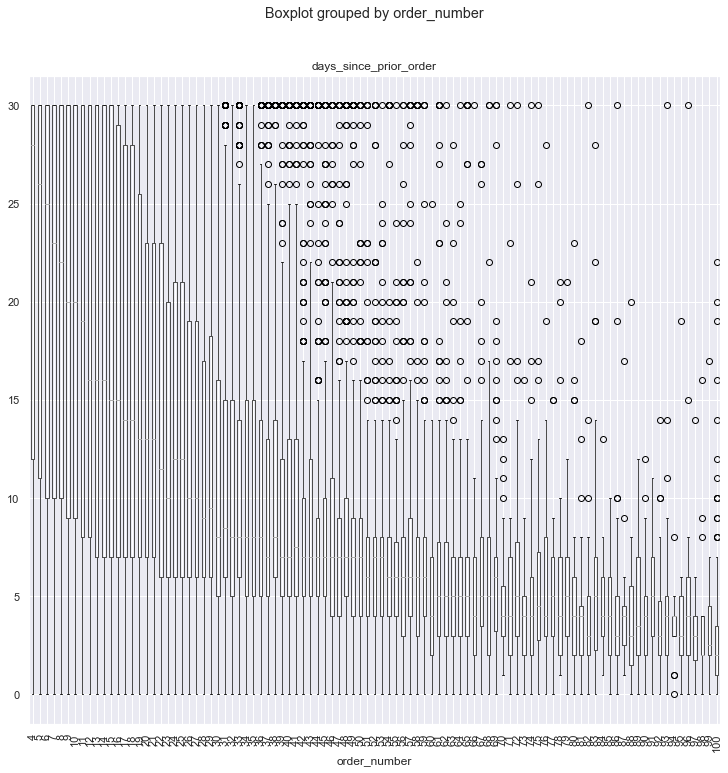

In [31]:
orders_test.boxplot(["days_since_prior_order"],by="order_number",figsize=(12,12))
#plt.title("Boxplot of orders along hours by day of week in test set")
plt.xticks(rotation=90)
plt.show()

As the customer orders more, we see that the number of days between order reduces with some customers ordering twice a week. Let us look at order quantity across the different customers when we study the detailed orders dataframe.

In [32]:
#Import the prior order details and training details
order_details_prior=pd.read_csv("../raw_data/order_products__prior.csv")
order_details_train=pd.read_csv("../raw_data/order_products__train.csv")

In [33]:
#Get the info of prior orders
order_details_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [34]:
#Get the info of orders in train
order_details_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


Let us analyze the number of times each item was ordered and if it was an item that was reordered a lot.

In [35]:
order_details_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [38]:
most_purchased_prior=order_details_prior["product_id"].value_counts()

In [55]:
top25_prior=most_purchased_prior[:25]
top25_prior=pd.DataFrame(top25_prior)
top25_prior.reset_index(inplace=True)
top25_prior.columns=["product_id","purchased_qty"]
#Let us merge it with products dataframe to find what products were ordered most
top25_prior=top25_prior.merge(products,on="product_id",validate="1:1")
top25_prior.head()

,product_id,purchased_qty,product_name,aisle_id,department_id
0,24852,472565,Banana,24,4
1,13176,379450,Bag of Organic Bananas,24,4
2,21137,264683,Organic Strawberries,24,4
3,21903,241921,Organic Baby Spinach,123,4
4,47209,213584,Organic Hass Avocado,24,4


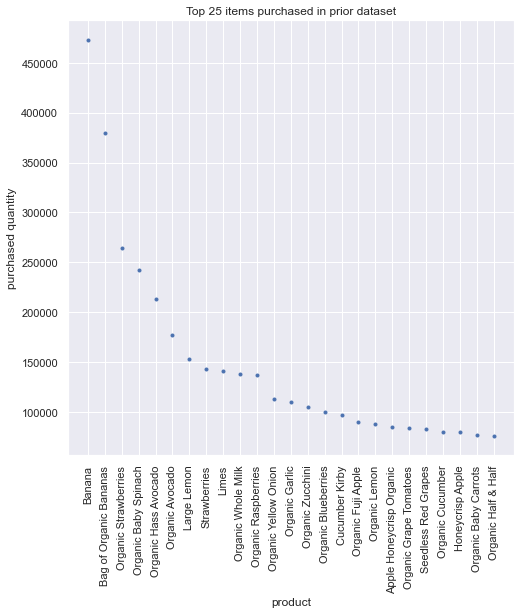

In [71]:
plt.figure(figsize=(8,8))
plt.plot(top25_prior["product_name"],top25_prior["purchased_qty"],marker='.',linestyle='none')
plt.xlabel("product")
plt.ylabel("purchased quantity")
plt.title("Top 25 items purchased in prior dataset")
plt.xticks(rotation=90)
plt.show()

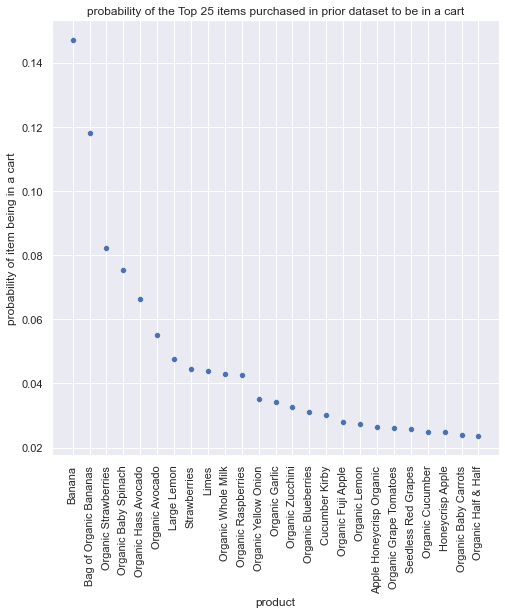

In [70]:
#Let us look at the probability of finding these 25 items in a cart. 
#This is obtained by dividing the count of the items by the number of unique orders
unique_orders_prior_count=order_details_prior["order_id"].nunique()

#Now, let us do the scatter plot of proportions of the top 25 products
plt.figure(figsize=(8,8))
sns.scatterplot(x=top25_prior["product_name"],y=top25_prior["purchased_qty"]/unique_orders_prior_count)
plt.xlabel("product")
plt.ylabel("probability of item being in a cart")
plt.title("probability of the Top 25 items purchased in prior dataset to be in a cart")
plt.xticks(rotation=90)
plt.show()

In [72]:
#Repeating the analysis for the training set,
most_purchased_train=order_details_train["product_id"].value_counts()
top25_train=most_purchased_train[:25]
top25_train=pd.DataFrame(top25_train)
top25_train.reset_index(inplace=True)
top25_train.columns=["product_id","purchased_qty"]
#Let us merge it with products dataframe to find what products were ordered most
top25_train=top25_train.merge(products,on="product_id",validate="1:1")
top25_train.head()

,product_id,purchased_qty,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4


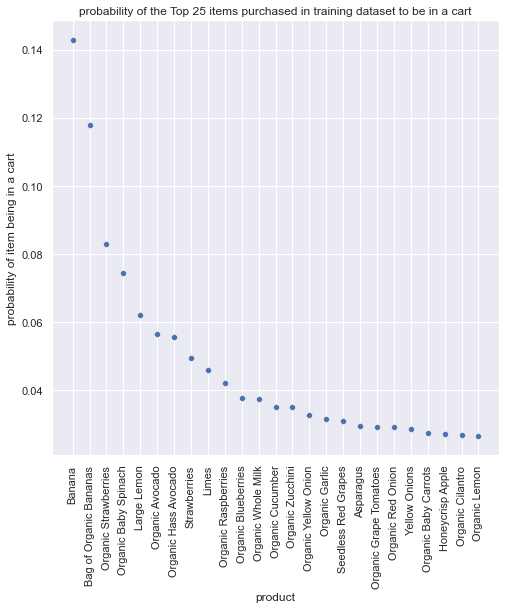

In [73]:
#Let us look at the probability of finding these 25 items in a cart. 
#This is obtained by dividing the count of the items by the number of unique orders
unique_orders_train_count=order_details_train["order_id"].nunique()

#Now, let us do the scatter plot of proportions of the top 25 products
plt.figure(figsize=(8,8))
sns.scatterplot(x=top25_train["product_name"],y=top25_train["purchased_qty"]/unique_orders_train_count)
plt.xlabel("product")
plt.ylabel("probability of item being in a cart")
plt.title("probability of the Top 25 items purchased in training dataset to be in a cart")
plt.xticks(rotation=90)
plt.show()

Bananas are the most common item that is ordered followed by strawberry, spinach and avocados. The organic items dominate the most frequently bought itms list when compared to the non-organic counterparts.

In [75]:
order_details_prior.corr()

,order_id,product_id,add_to_cart_order,reordered
order_id,1.000000,-0.000082,-0.000320,-0.000253
product_id,-0.000082,1.000000,0.005529,0.003718
add_to_cart_order,-0.000320,0.005529,1.000000,-0.133024
reordered,-0.000253,0.003718,-0.133024,1.000000
